<a href="https://colab.research.google.com/github/elavens/PyMe/blob/main/Wards_Clustering_Method(Minimum_Variance_Method).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
data = pd.read_excel('/content/drive/MyDrive/read.xlsx')
print(data)

x_values = data['X'].tolist()
y_values = data['Y'].tolist()


X = [[x, y] for x, y in zip(x_values, y_values)]

print('X=' ,X)


    X   Y
0   3   7
1   2  10
2   2  10
3  15   7
4   2  10
5   3   7
X= [[3, 7], [2, 10], [2, 10], [15, 7], [2, 10], [3, 7]]


In [5]:
def ward_clustering(X):
    n = X.shape[0]
    clusters = [[i] for i in range(1, n+1)]
    while len(clusters) > 1:
        min_error = np.inf
        merge_index = (0, 0)
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                error = np.sum((X[np.array(clusters[i])-1][:, None] - X[np.array(clusters[j])-1][None, :])**2)
                if error < min_error:
                    min_error = error
                    merge_index = (i, j)
        clusters.append(clusters[merge_index[0]] + clusters[merge_index[1]])
        del clusters[merge_index[1]]
        del clusters[merge_index[0]]
        variances = []
        for c in clusters:
            mean = np.mean(X[np.array(c)-1], axis=0)
            var = np.sum((X[np.array(c)-1] - mean)**2)
            variances.append(var)
        print(f"Clusters: {clusters}, Variances: {variances}, Error: {min_error}")
    return clusters

X = np.array(X)
ward_clustering(X)


Clusters: [[2], [3], [4], [5], [1, 6]], Variances: [0.0, 0.0, 0.0, 0.0, 0.0], Error: 0
Clusters: [[4], [5], [1, 6], [2, 3]], Variances: [0.0, 0.0, 0.0, 0.0], Error: 0
Clusters: [[4], [1, 6], [5, 2, 3]], Variances: [0.0, 0.0, 0.0], Error: 0
Clusters: [[4], [1, 6, 5, 2, 3]], Variances: [0.0, 12.0], Error: 60
Clusters: [[4, 1, 6, 5, 2, 3]], Variances: [147.0], Error: 822


[[4, 1, 6, 5, 2, 3]]

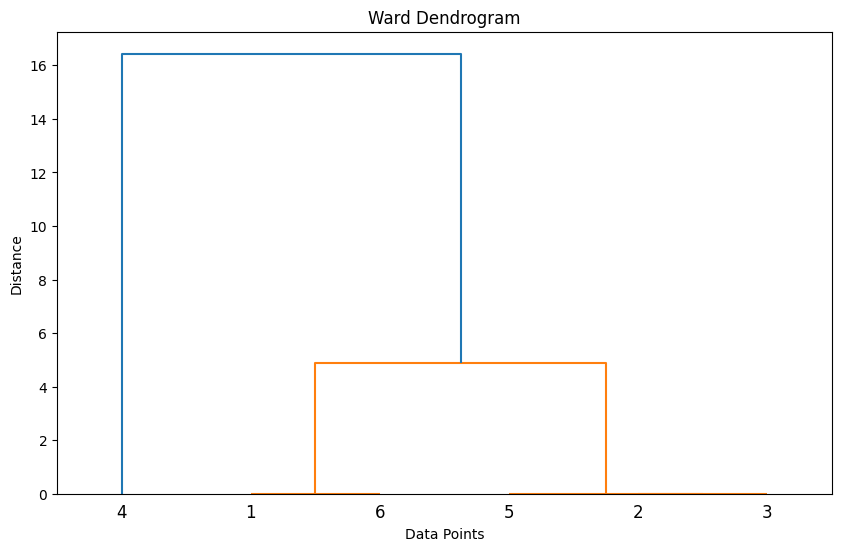

In [6]:
#dendogram
def ward_dendrogram(data, labels):
    linkage_matrix = linkage(data, method='ward')
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=labels)
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.title('Ward Dendrogram')
    plt.show()

labels = np.arange(1, len(X) + 1)
ward_dendrogram(X, labels)
